In [1]:
# -*- coding: utf-8 -*-
#import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
#import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
from pylab import figure, scatter, show
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
from math import cos

#import geoplot as gplt
#import geoplot.crs as gcrs
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [2]:
df_map = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp', crs='ESRI:54004')
def find_lsoa(point):
    for name, polygon in zip(df_map['LSOA11CD'], df_map['geometry']):
        if point.within(polygon):
            return name
    return ''

In [3]:
year = 2020 
for y in range(2014,2024):
    scattergdf = gpd.read_file(f'../result/data/osm_poi_data_selected/{y}/greater-london-{y}-free-selected.shp')
    scattergdf = scattergdf.to_crs(crs='OSGB36 / British National Grid + ODN height') #经纬度转笛卡尔坐标系
    scattergdf['LSOA'] = scattergdf['geometry'].apply(find_lsoa)
    scattergdf.to_file(f'../result/data/{y}_poi_LSOA.shp',
               driver='ESRI Shapefile',
               encoding='utf-8')

In [5]:
df_map_borough = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI', crs='ESRI:54004')
df_map_borough

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023   3531.706      16.795         T   
13               Greenwich  E09000011   5044.190     310.785         F   
14                  Bexley  E09000004   6428.649     370.619         F   
15                 Enfield  E09000010   8220.025       0.000         F   
16          Waltham Forest  E09000031   3880.793       0.000         F   
17               Redbridge  E09000026   5644.225       2.300         F   
18                  Sutton  E09000029   4384.698       0.000         F   
19    Richmond upon Thames  E09000027   5876.111     135.443         F   
20                  Merton  E09000024   3762.466       0.000         F   
21              Wandsworth  E09000032   3522.022      95.600         T   
22  Hammersmith and Fulham  E09000013   1715.409      75.648         T   
23  Kensington and Chelsea  E09000020   1238.379      25.994         T   
24             Westminster  E09000033   2203.005      54.308         T   
25                  Camden  E09000007   2178.932       0.000         T   
26           Tower Hamlets  E09000030   2157.501     179.707         T   
27               Islington  E09000019   1485.664       0.000         T   
28                 Hackney  E09000012   1904.902       0.000         T   
29                Haringey  E09000014   2959.837       0.000         T   
30                  Newham  E09000025   3857.806     237.637         T   
31    Barking and Dagenham  E09000002   3779.934     169.150         F   
32          City of London  E09000001    314.942      24.546         T   

   SUB_2009 SUB_2006                                           geometry  
0      None     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1      None     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2      None     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3      None     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4      None     None  POLYGON ((510253.500 182881.600, 510249.900 18...  
5      None     None  POLYGON ((549893.900 181459.800, 549894.600 18...  
6      None     None  POLYGON ((510599.800 191689.500, 510615.200 19...  
7      None     None  POLYGON ((510599.800 191689.500, 510660.000 19...  
8      None     None  POLYGON ((525201.000 182512.600, 525181.500 18...  
9      None     None  POLYGON ((524579.900 198355.200, 524594.300 19...  
10     None     None  POLYGON ((530046.800 177893.400, 530048.400 17...  
11     None     None  POLYGON ((531335.600 180529.500, 531337.700 18...  
12     None     None  POLYGON ((536691.000 178958.600, 536691.900 17...  
13     None     None  MULTIPOLYGON (((537238.700 178137.700, 537242....  
14     None     None  POLYGON ((547226.200 181299.300, 547320.900 18...  
15     None     None  POLYGON ((531023.500 200933.600, 531039.900 20...  
16     None     None  POLYGON ((539923.100 191863.100, 539928.100 19...  
17     None     None  POLYGON ((543595.500 184832.800, 543577.100 18...  
18     None     None  POLYGON ((528552.300 159658.100, 528399.700 15...  
19     None     None  POL

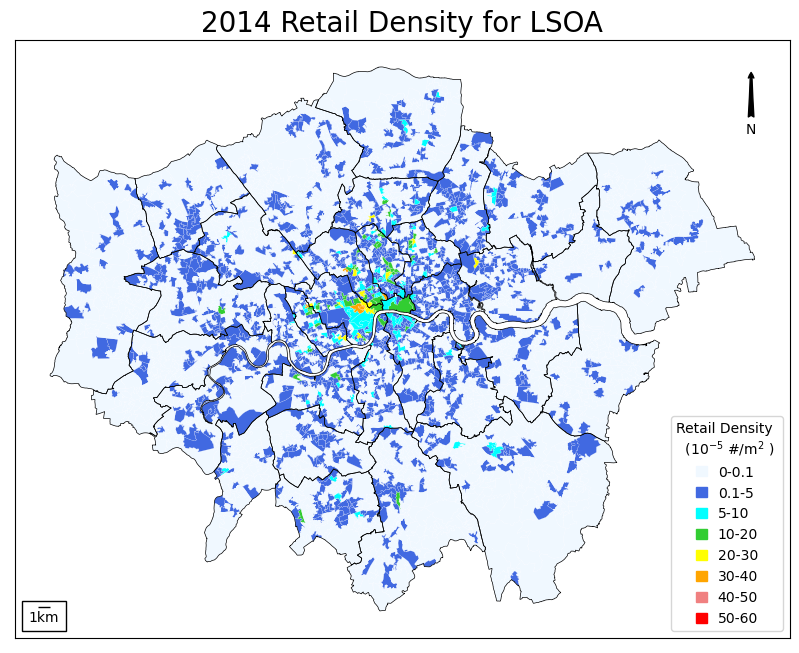

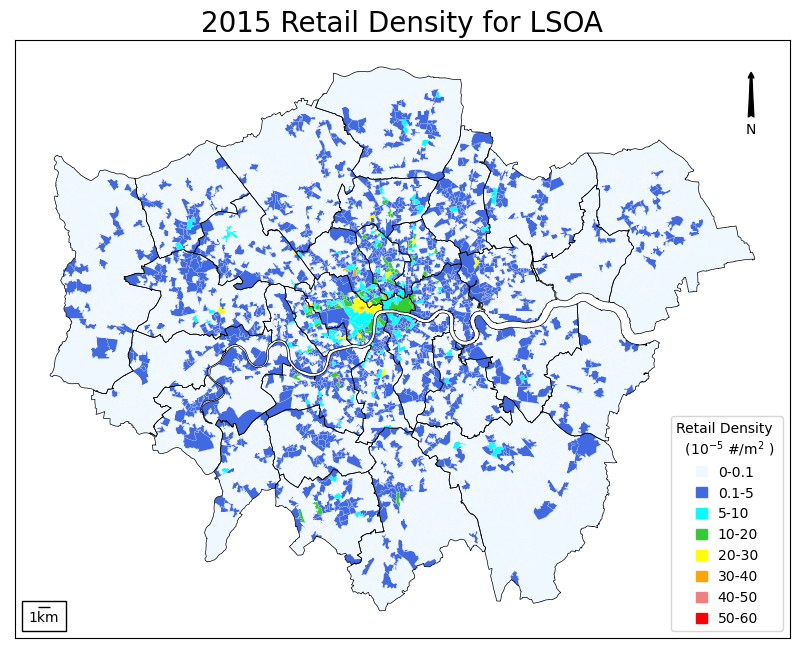

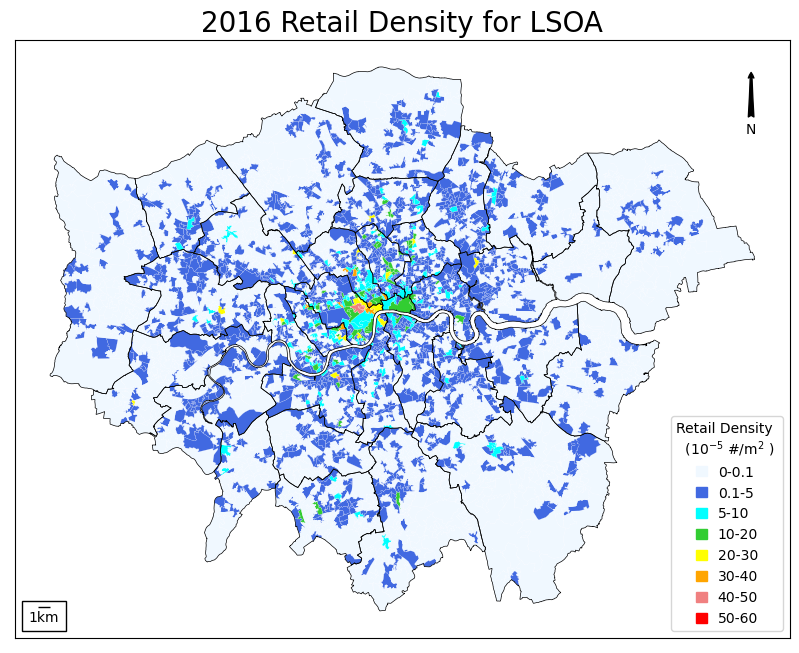

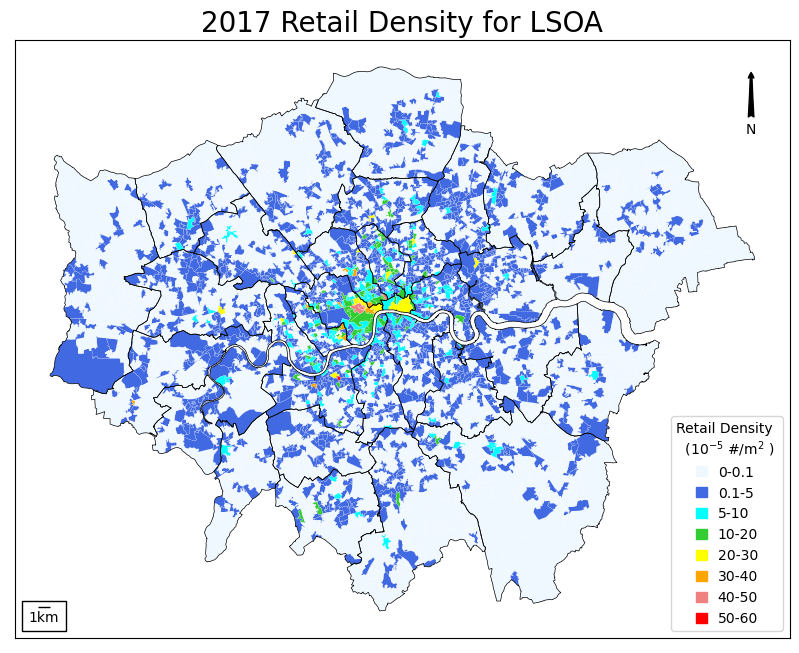

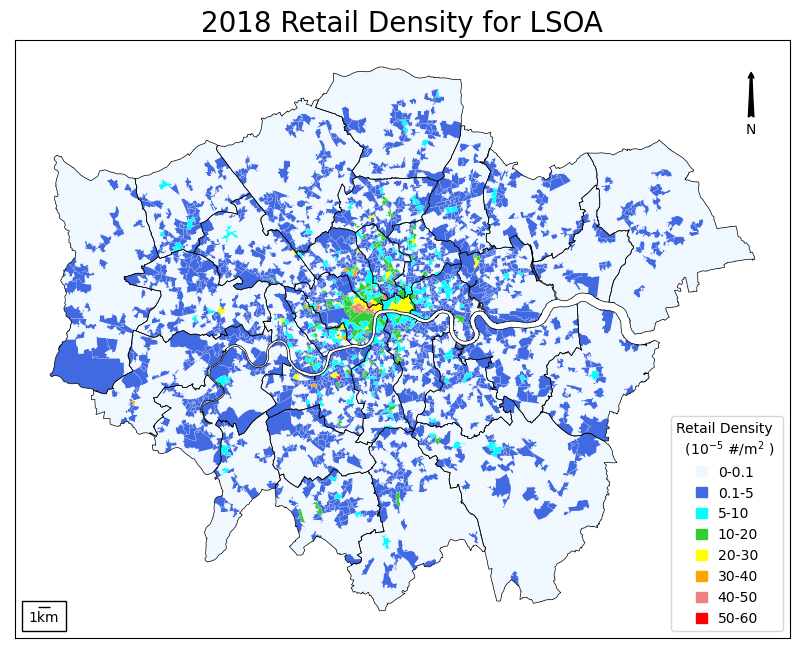

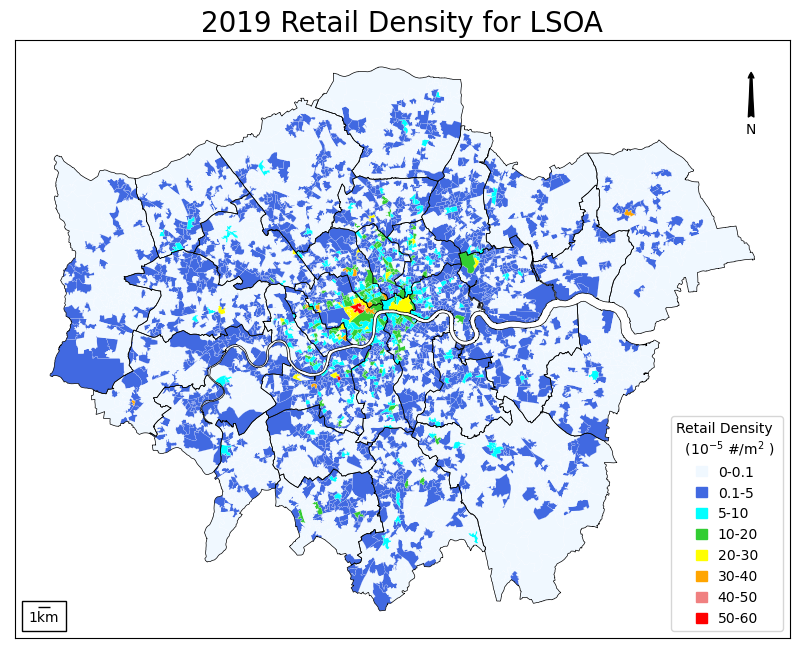

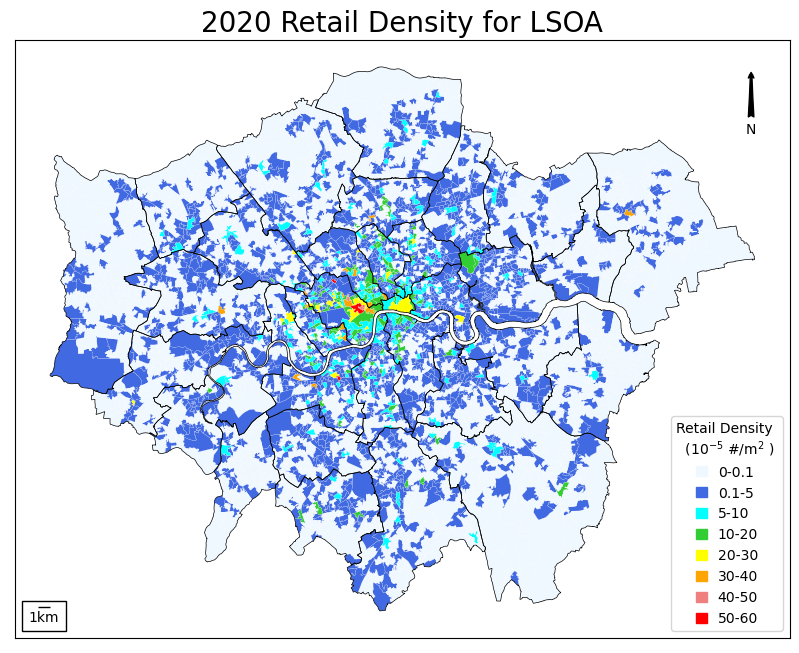

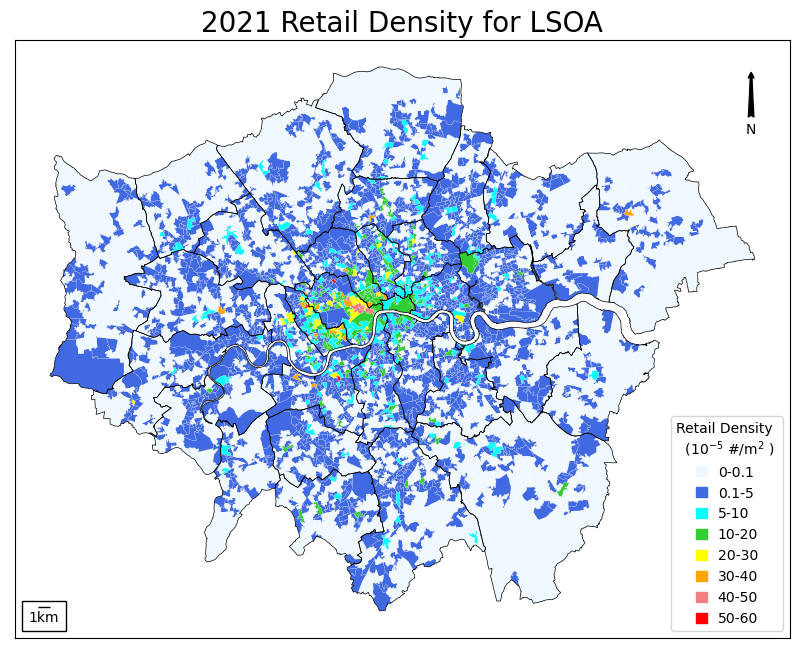

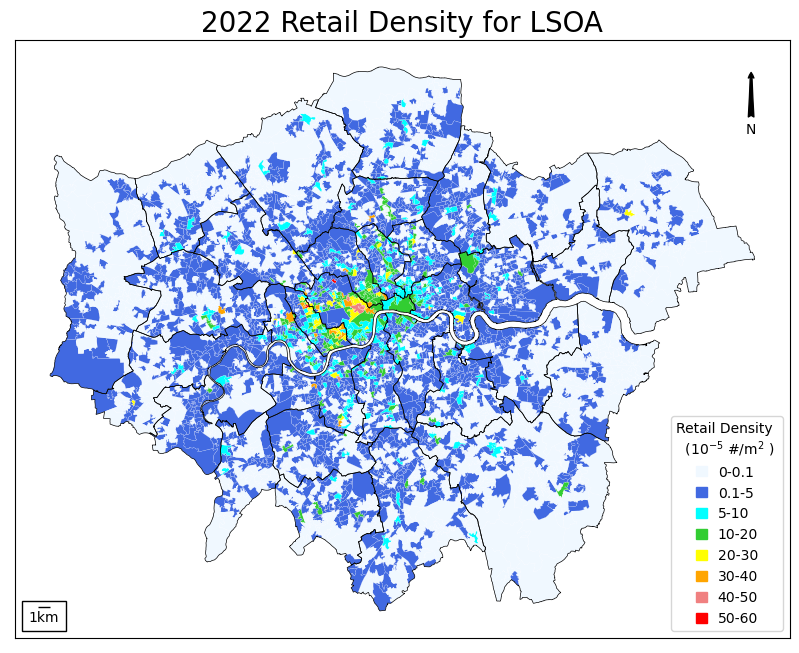

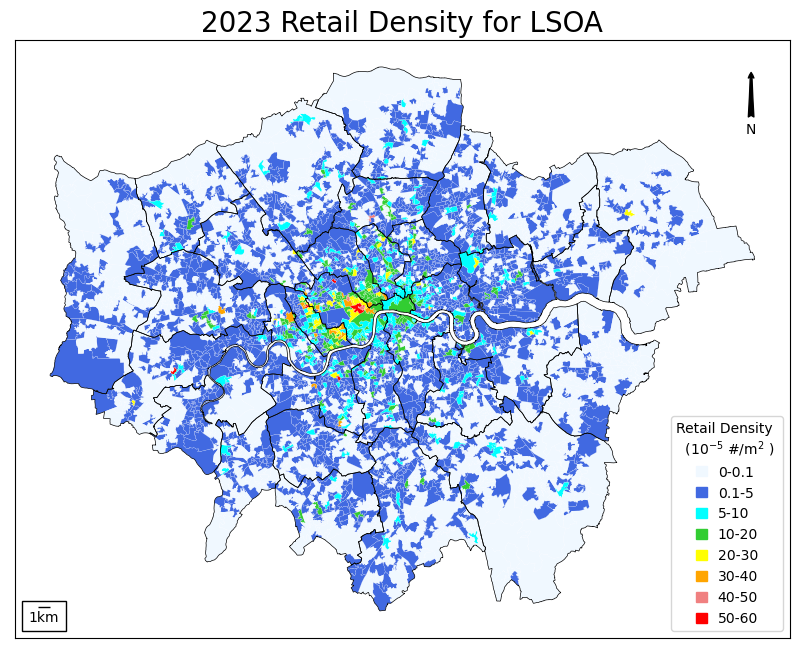

In [6]:
import matplotlib.colors as colors
levels0 = [0,0.1,5,10,20,30,40,50,60]
levels = [i*1e-5 for i in levels0]
color = ['aliceblue','royalblue','cyan','limegreen','yellow','orange','lightcoral','red']
cmap = colors.ListedColormap(color)
norm = colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for yyy in range(2014,2024):
    scattergdf = gpd.read_file(f'../result/data/{yyy}_poi_LSOA.shp')
    temp = scattergdf['LSOA'].value_counts()
    temp = pd.DataFrame(temp)
    temp.rename(columns={'LSOA':'Retail_count'},inplace=True)
    temp['LSOA'] = temp.index
    df_map2 = pd.merge(df_map,temp,left_on='LSOA11CD', right_on = 'LSOA',
                              how='left')
    df_map2 = df_map2.fillna(value={'Retail_count':0})
    df_map2['Retail_Density']  = df_map2['Retail_count']/df_map2.area

    # draw the ratail density for Borough 
    fig,ax = plt.subplots(figsize=(10,10))
    # draw the positions of retail shops
    df_map2.plot(ax=ax,edgecolor='w',lw=0.1,zorder=12,
                 norm=norm,cmap=cmap,column='Retail_Density')

    # add the borough name 
    #centroids = df_map_borough.geometry.centroid
    #for i,p in enumerate(centroids):
    #    ax.text(p.x,p.y,s = df_map_borough.loc[i,'NAME'],fontsize=10,color='k',zorder=13,
    #            horizontalalignment='center')
    df_map_borough.plot(ax=ax,edgecolor='k',lw=0.5,zorder=14,facecolor='none')

    #ax.axis('off')
    plt.xticks([])
    plt.yticks([])

    #plot North arrow
    x,y,arrow_length = 0.95,0.95,0.1
    ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
                ha = 'center',va='center',fontsize=10,
                arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
                xycoords=ax.transAxes)

    #plot scale bar
    size = 1000  # distance
    iow_scale_bar = AnchoredSizeBar(ax.transData,
                                    size=size,label='1km',loc='lower left',pad=0.5,
                                    borderpad=0.5,color='black',
                                    frameon=True)#,size_vertical=0.5)
    ax.add_artist(iow_scale_bar)

    #plot legend
    labels2 = [f'{levels0[i]}-{levels0[i+1]}' for i in range(len(levels)-1)]
    legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
                          label=labels2[i]) for i in range(len(levels)-1)]

    ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='Retail Density \n  (10$^{-5}$ #/m$^{2}$ )')
    plt.title(f'{yyy} Retail Density for LSOA',fontsize=20)

    path_out = '../result/plot/'
    filename = f'{yyy}_London_LSOA_with_retail_density'
    plt.savefig(path_out+filename+'.png',
                    dpi=500,bbox_inches = 'tight')